# Using DL / ML models to detect redaction

### To help answer the research question "To What extent can machine learning and deep learning can investigate and detect redacted regions of sensitive information in documents? And what are the optimal algorithms that produce the most efficient results?",  DL/ML models will be trained to detect redaction.  The diagram clarifies the approach 

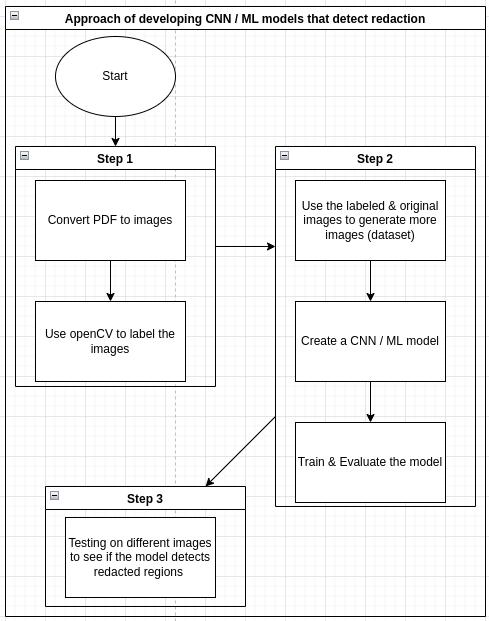

#### Import the packages


In [23]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils
#Import tenserflow
import os
import glob
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import segmentation_models as sm
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten


### Define the backbone and create the training images and training masks array (from the original images and the images that were labeled using openCV). while creating the arrays, the images are bing resized to avoid having issues while using the DL/ML model(s). 

In [14]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [15]:
#Resizing images 
SIZE_X = 256 
SIZE_Y = 256

In [16]:
#Create training and test array
train_images = []

for directory_path in glob.glob("aug_imgnew"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path)       
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
       # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        #train_labels.append(label)
#Convert list to array for machine learning processing        
train_images = np.array(train_images)

In [17]:
train_masks = []

for directory_path in glob.glob("aug_masknew"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path)       
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        train_masks.append(img)
        #train_labels.append(label)
#Convert list to array for machine learning processing        
train_masks = np.array(train_masks)

### Split the dataset using "train_test_split"

In [26]:
#Use customary x_train and y_train variables
X = train_images
Y = train_masks
#Y = np.expand_dims(Y, axis=3) #May not be necessary..

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# preprocess input
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

### Build the model & train it

In [27]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(256, 256, 3), activation='relu'))
# output layer
model.add(Dense(3, activation='softmax'))

In [28]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(x_train, x_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
2/2 [==============================] - 7s 2s/step - loss: 19934.0898 - accuracy: 0.9313 - val_loss: 21023.9785 - val_accuracy: 0.9069
Epoch 2/20
2/2 [==============================] - 7s 2s/step - loss: 21005.0195 - accuracy: 0.9322 - val_loss: 22096.9043 - val_accuracy: 0.9077
Epoch 3/20
2/2 [==============================] - 6s 2s/step - loss: 22078.7598 - accuracy: 0.9332 - val_loss: 23184.5996 - val_accuracy: 0.9083
Epoch 4/20
2/2 [==============================] - 8s 2s/step - loss: 23171.6602 - accuracy: 0.9339 - val_loss: 24289.5176 - val_accuracy: 0.9087
Epoch 5/20
2/2 [==============================] - 7s 2s/step - loss: 24271.8262 - accuracy: 0.9344 - val_loss: 25423.7539 - val_accuracy: 0.9091
Epoch 6/20
2/2 [==============================] - 6s 2s/step - loss: 25400.7539 - accuracy: 0.9348 - val_loss: 26569.9629 - val_accuracy: 0.9095
Epoch 7/20
2/2 [==============================] - 6s 2s/step - loss: 26545.8691 - accuracy: 0.9352 - val_loss: 27740.8945 - val_ac

### About 93 % accuracy was achieved